#Theoretical

1. What is a Support Vector Machine (SVM)4?
-  A Support Vector Machine is a supervised machine-learning algorithm used for classification and regression.
-  Its goal is to find the optimal separating hyperplane that maximizes the margin between different classes.

2. What is the difference between Hard Margin and Soft Margin SVM?
-  Hard Margin
   - Assumes data is perfectly linearly separable.
   - No misclassification allowed.
   - Maximizes the margin strictly.
   - Not robust to noise/outliers.

-  Soft Margin
   - Allows some misclassification using slack variables.
   - Controlled by the C parameter.
   -Robust to noise, suitable for real-world data.

3. What is the mathematical intuition behind SVM?
-  SVM tries to find a hyperplane:
   - w^Tx + b=0
-  It maximize the margin:
   - Margin=2/∥w∥
- Subject to constraints ensuring correct classification.
- Thus, SVM reduces to a convex optimization problem balancing margin maximization and error minimization.​


What is the role of Lagrange Multipliers in SVM?
- SVM uses Lagrange multipliers (αᵢ) to convert the constrained optimization problem into a dual problem, allowing:
   - Efficient optimization
   - Use of the kernel trick
   - Identification of support vectors (where αᵢ > 0)

5. What are Support Vectors in SVM?
- Support vectors are the data points closest to the decision boundary.
They:
   - Determine the position of the hyperplane
   - Are the only points with non-zero αᵢ
   - Make SVM robust: removing non-support vectors does not change the model

6. What is a Support Vector Classifier (SVC)?
- The SVC is simply the SVM algorithm for classification tasks, implemented in frameworks like scikit-learn. It supports multiple kernels: linear, polynomial, RBF, etc.

7. What is a Support Vector Regressor (SVR)?
- SVR is the regression version of SVM.Instead of separating classes, it:
   - Fits a function within an ε–insensitive tube
   - Penalizes predictions outside the tube

8. What is the Kernel Trick in SVM?
- The kernel trick maps data to a higher-dimensional feature space without explicitly computing the mapping. Using a kernel function k(xi,xj) , SVM can efficiently learn non-linear decision boundaries.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
- Linear Kernel:
   - Good for large-scale, high-dimensional data (e.g., text).
   - Fast and simple.
   - Works when data is roughly linearly separable.
- Polynomial Kernel:
   - Captures interactions between features.
   - Useful when relationships are moderately nonlinear.
- RBF (Gaussian) Kernel:
   - Most popular for nonlinear problems.
   - Very flexible (may overfit if parameters not tuned).

10. What is the effect of the C parameter in SVM?
- C controls the trade-off between margin width and classification errors:
- Large C
   - Low tolerance for misclassification
   - Narrow margin
   - Risk of overfitting

- Small C
   - Higher tolerance for misclassification
   - Wider margin
   -More generalizable but might underfit

11. What is the role of the Gamma parameter in RBF Kernel SVM?
- Gamma controls the influence of each training example:
- High γ
   - Small radius of influence
   - Highly complex boundaries → overfitting

- Low γ
   - Large radius of influence
   - Smoother boundaries → underfitting

12.What is the Naïve Bayes classifier, and why is it called "Naïve"?
- Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem with a “naïve” assumption that all features are conditionally independent given the class.
Despite the assumption being unrealistic, it performs extremely well (especially in text classification).

13. What is Bayes’ Theorem?
- P(Y|X)=P(X|Y)P(Y)/P(X)
- Where:
   - P(Y∣X): posterior probability
   - P(X∣Y): likelihood
   - P(Y): prior
   - P(X): evidence

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
 - Gaussian NB
   - Assumes features follow a normal distribution
   - Used for continuous data
- Multinomial NB
   - Assumes count data (e.g., word frequency)
   - Common in text classification
- Bernoulli NB
   - Assumes binary features (word present or not)
   - Good for short text, binary bag-of-words

15. When should you use Gaussian Naïve Bayes over other variants?
- Use Gaussian NB when:
- Features are continuous
   - They approximately follow a normal distribution
   - Example domains: sensor readings, image pixel intensities.

16. What are the key assumptions made by Naïve Bayes?
- Conditional independence of features
- Equal contribution of each feature
- Data is generated from a specific distribution (Gaussian, multinomial, etc.)

17. What are the advantages and disadvantages of Naïve Bayes?
- Advantages
   - Fast training and prediction
   - Works well with high-dimensional data
   - Low memory usage
   - Excellent for text classification
- Disadvantages
   - Independence assumption rarely holds
   - Poor with correlated features
   - Probability estimates may be inaccurate

18. Why is Naïve Bayes a good choice for text classification?
- Text data is high-dimensional → NB handles it efficiently
- Word independence is a reasonable approximation
- Performs well with sparse data
- Very fast and scalable

19. Compare SVM and Naïve Bayes for classification tasks.
- | Aspect               | SVM                                                 | Naïve Bayes                       |
| -------------------- | --------------------------------------------------- | --------------------------------- |
| **Speed**            | Slower to train                                     | Extremely fast                    |
| **Performance**      | Often higher accuracy                               | Good but may be weaker            |
| **Data Type**        | Works well with continuous or high-dimensional data | Best for text or categorical data |
| **Interpretability** | Moderate                                            | High                              |
| **Non-linearity**    | Kernel trick enables it                             | Limited                           |
| **Scalability**      | OK but slower for huge datasets                     | Excellent                         |


20. How does Laplace Smoothing help in Naïve Bayes?
- Laplace (add-one) smoothing fixes the zero-frequency problem.
- If a word is not seen in a class during training:
   - Without smoothing → probability becomes zero
   - Completely ruins predicted posterior probabilities

#Practical

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVM Classifier
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy on Iris Dataset:", acc)


Accuracy on Iris Dataset: 1.0


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear kernel SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_pred = linear_svm.predict(X_test)
linear_acc = accuracy_score(y_test, linear_pred)

# RBF kernel SVM
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
rbf_pred = rbf_svm.predict(X_test)
rbf_acc = accuracy_score(y_test, rbf_pred)

print("Linear SVM Accuracy:", linear_acc)
print("RBF SVM Accuracy:", rbf_acc)


Linear SVM Accuracy: 1.0
RBF SVM Accuracy: 0.8055555555555556


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
print("SVR Mean Squared Error:", mse)


SVR Mean Squared Error: 1.3320115421348744


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

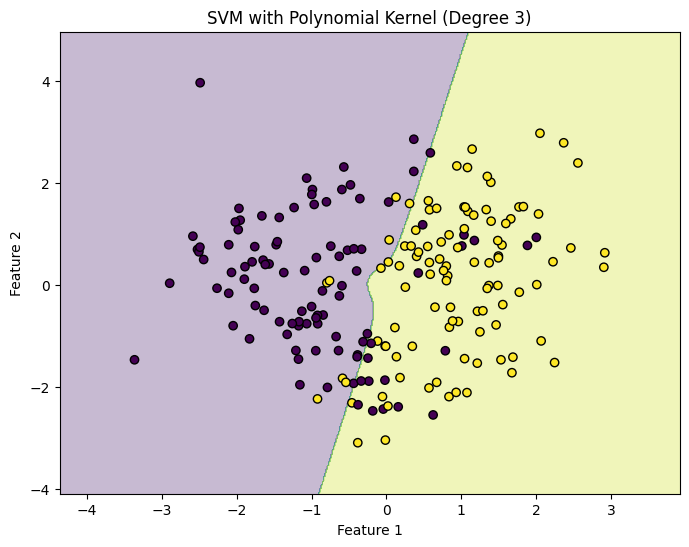

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np

# Generate simple 2D dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, random_state=42
)

# Train Polynomial SVM
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8,6))

# Create mesh grid
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.title("SVM with Polynomial Kernel (Degree 3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Gaussian NB Accuracy:", acc)


Gaussian NB Accuracy: 0.9736842105263158


26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
categories = None  # uses all categories
data = fetch_20newsgroups(subset='all', categories=categories)

X, y = data.data, data.target

# Convert text to bag-of-words counts
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

# Train Multinomial NB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Multinomial NB Accuracy:", acc)


Multinomial NB Accuracy: 0.8742705570291777


27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

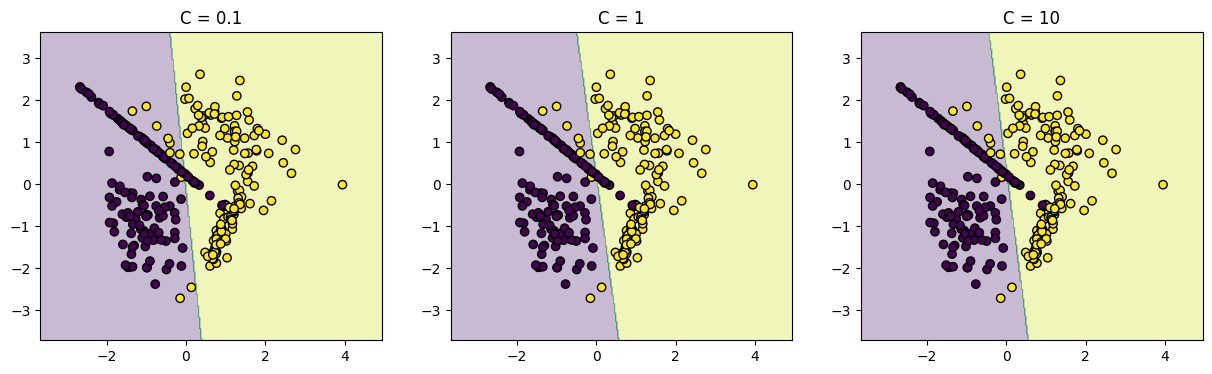

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate 2D dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42)

C_values = [0.1, 1, 10]

plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plot decision boundary
    plt.subplot(1, 3, i+1)
    plt.title(f"C = {C}")

    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')

plt.show()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Binary features dataset
X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X = (X > 0).astype(int)  # binarize features

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Bernoulli NB Accuracy:", acc)


Bernoulli NB Accuracy: 0.85


29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Unscaled
clf_unscaled = SVC()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = clf_unscaled.score(X_test, y_test)

# Scaled
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf_scaled = SVC()
clf_scaled.fit(X_train_s, y_train)
acc_scaled = clf_scaled.score(X_test_s, y_test)

print("Unscaled Accuracy:", acc_unscaled)
print("Scaled Accuracy:", acc_scaled)


Unscaled Accuracy: 0.8055555555555556
Scaled Accuracy: 1.0


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Normal Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)

# Gaussian NB with smoothing (var_smoothing parameter)
gnb_laplace = GaussianNB(var_smoothing=1e-5)
gnb_laplace.fit(X_train, y_train)
pred2 = gnb_laplace.predict(X_test)

print("Without Laplace:", accuracy_score(y_test, pred1))
print("With Laplace:", accuracy_score(y_test, pred2))


Without Laplace: 1.0
With Laplace: 1.0


31. = Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X, y = load_iris(return_X_y=True)

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.9866666666666667


32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Imbalanced dataset
X, y = make_classification(
    n_samples=2000, n_classes=2, weights=[0.9, 0.1],
    n_features=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_default = SVC()
clf_default.fit(X_train, y_train)
pred1 = clf_default.predict(X_test)

clf_weighted = SVC(class_weight='balanced')
clf_weighted.fit(X_train, y_train)
pred2 = clf_weighted.predict(X_test)

print("Default SVM Accuracy:", accuracy_score(y_test, pred1))
print("Weighted SVM Accuracy:", accuracy_score(y_test, pred2))


Default SVM Accuracy: 0.948
Weighted SVM Accuracy: 0.918


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all', categories=['sci.space', 'talk.politics.guns'])

X, y = data.data, data.target

vec = TfidfVectorizer(stop_words='english')
X_vec = vec.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print("Spam Detection Accuracy:", accuracy_score(y_test, pred))


Spam Detection Accuracy: 0.9936842105263158


34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("SVM Accuracy:", svm.score(X_test, y_test))
print("NB Accuracy:", nb.score(X_test, y_test))


SVM Accuracy: 1.0
NB Accuracy: 1.0


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# NB without feature selection
nb1 = GaussianNB().fit(X_train, y_train)
acc1 = nb1.score(X_test, y_test)

# NB with feature selection
selector = SelectKBest(f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

nb2 = GaussianNB().fit(X_train_sel, y_train)
acc2 = nb2.score(X_test_sel, y_test)

print("NB without selection:", acc1)
print("NB with selection:", acc2)


NB without selection: 1.0
NB with selection: 0.9333333333333333


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", ovr.score(X_test, y_test))
print("OvO Accuracy:", ovo.score(X_test, y_test))


OvR Accuracy: 0.7111111111111111
OvO Accuracy: 0.7777777777777778


37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

X, y = load_breast_cancer(return_X_y=True)

kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X, y)
    print(f"{k} Kernel Accuracy:", clf.score(X, y))


linear Kernel Accuracy: 0.9666080843585237
poly Kernel Accuracy: 0.9138840070298769
rbf Kernel Accuracy: 0.9226713532513181


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)

svm = SVC()
cv = StratifiedKFold(n_splits=5)

scores = cross_val_score(svm, X, y, cv=cv)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9666666666666666


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

priors = [0.2, 0.5, 0.3]

nb = GaussianNB(priors=priors)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nb.fit(X_train, y_train)
print("Accuracy with custom priors:", nb.score(X_test, y_test))


Accuracy with custom priors: 1.0


40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC(kernel='linear')
rfe = RFE(svm, n_features_to_select=5)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

svm2 = SVC(kernel='linear')
svm2.fit(X_train_rfe, y_train)

print("Accuracy after RFE:", svm2.score(X_test_rfe, y_test))


Accuracy after RFE: 0.9111111111111111


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
pred_prob = nb.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, pred_prob))


Log Loss: 0.028237041769258495


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

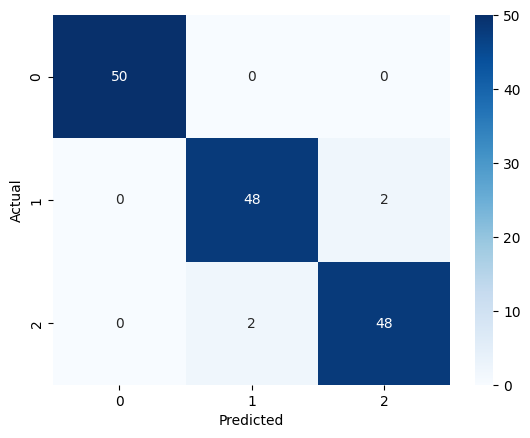

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = load_iris(return_X_y=True)
clf = SVC()
clf.fit(X, y)
pred = clf.predict(X)

cm = confusion_matrix(y, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVR()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)

print("SVR MAE:", mae)


SVR MAE: 0.8674205743031635


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

prob = nb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, prob)

print("ROC-AUC:", auc)


ROC-AUC: 0.9935497295047857


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

Average Precision Score: 0.9960990902415073


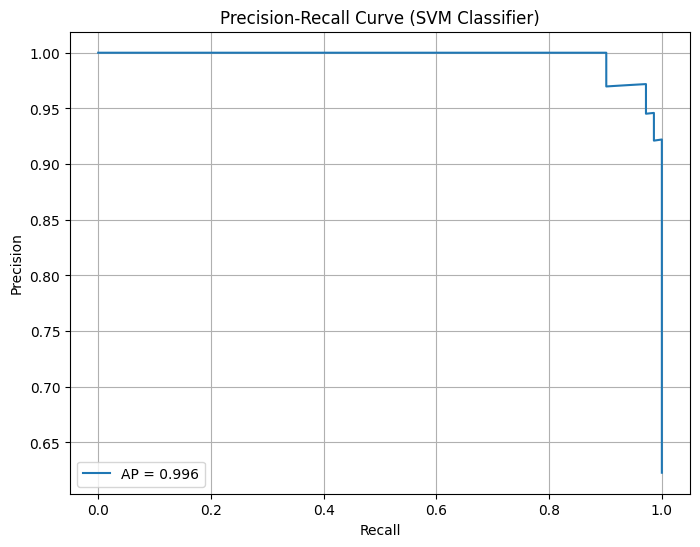

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset (binary classification)
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVM with probability estimates enabled
clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
probs = clf.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Average Precision Score (area under PR curve)
ap_score = average_precision_score(y_test, probs)
print("Average Precision Score:", ap_score)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SVM Classifier)")
plt.grid(True)
plt.legend()
plt.show()
